In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

# Load the IMDB dataset, keeping only the top 10,000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Display basic dataset information
print(f"Number of training samples: {len(x_train)}")
print(f"Number of testing samples: {len(x_test)}")
print(f"Example review before preprocessing: {x_train[0]}")
print(f"Label (0 = Negative, 1 = Positive): {y_train[0]}")

# Determine the maximum sequence length (optional)
max_length = 200  # You can adjust this value based on the dataset's distribution

# Pad the sequences to ensure they have the same length
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Display some details after padding
print(f"Shape of x_train after padding: {x_train_padded.shape}")
print(f"Shape of x_test after padding: {x_test_padded.shape}")
print(f"Example padded review: {x_train_padded[0]}")

Number of training samples: 25000
Number of testing samples: 25000
Example review before preprocessing: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 447

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define model parameters
embedding_dim = 32  # Size of the embedding vector
rnn_units = 32      # Number of units in the SimpleRNN layer
output_units = 1    # Binary classification output

# Build the Sequential model
model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=200),  # Embedding layer
    SimpleRNN(rnn_units, activation='tanh'),  # SimpleRNN layer
    Dense(output_units, activation='sigmoid')  # Dense output layer with sigmoid activation
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    loss='binary_crossentropy',          # Loss function for binary classification
    metrics=['accuracy']                 # Evaluation metric
)

# Display the model summary
model.summary()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    x_train_padded,  # Preprocessed training data
    y_train,         # Training labels
    batch_size=128,  # Batch size
    epochs=10,       # Number of epochs
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1        # Display training progress
)

# Training summary
print("Training complete.")

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4945 - loss: 0.6965 - val_accuracy: 0.5060 - val_loss: 0.6930
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6199 - loss: 0.6663 - val_accuracy: 0.5982 - val_loss: 0.6760
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6824 - loss: 0.6134 - val_accuracy: 0.5158 - val_loss: 0.7674
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7036 - loss: 0.5478 - val_accuracy: 0.5152 - val_loss: 0.7715
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7820 - loss: 0.4374 - val_accuracy: 0.5178 - val_loss: 0.8415
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8417 - loss: 0.3434 - val_accuracy: 0.5146 - val_loss: 0.9935
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8439 - loss: 0.3444 - val_accuracy: 0.5164 - val_loss: 0.9443
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8815 - loss: 0.2873 - val_accu

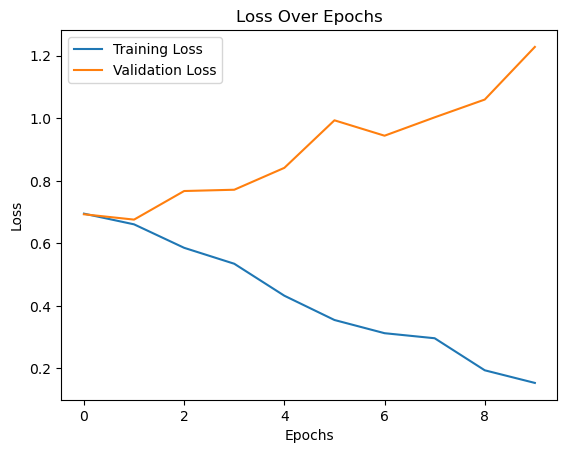

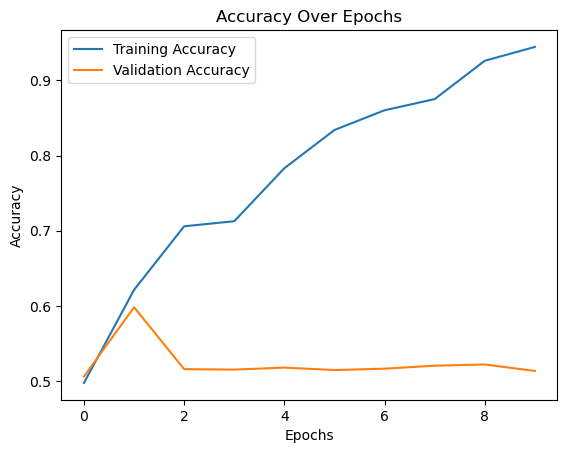

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_padded, y_test, verbose=1)

# Report the accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5070 - loss: 1.2471
Test Loss: 1.2558
Test Accuracy: 0.5082
